Reading the big influencer dump csv

In [2]:
import pandas as pd
import numpy as np

In [3]:
#Files can be found in polarbear:/meltwater/influencer-data/
influencer_dump_file = "influencer_updates.csv"
influencer_dump_dataframe = pd.read_csv(influencer_dump_file)
print (len(influencer_dump_dataframe))

348944


Creating the file list

In [4]:
file_name_list = []
num_file = 26
for i in range (0, num_file) :
    fn = str(i) + '_doc_stats_staging.csv'
    file_name_list.append(fn)

In [5]:
dataframe_all = pd.DataFrame(columns=["uuid", "doc_count_staging"])

for file_name in file_name_list:
    dataframe_temp = pd.read_csv(file_name, header = None)
    dataframe_temp.columns = ["uuid", "doc_count_staging"]

    dataframe_all = dataframe_all.append(dataframe_temp)

In [6]:
dataframe_all.describe()

,doc_count_staging
count,260000.000000
mean,41.019400
std,353.234827
min,0.000000
25%,0.000000
50%,0.000000
75%,7.000000
max,37174.000000


In [18]:
print ("Total document: ", sum(dataframe_all['doc_count_staging']))

Total document:  10665044.0


Joining influencer_dump_dataframe and dataframe_all

In [7]:
influencer_subset = influencer_dump_dataframe[influencer_dump_dataframe["uuid"].isin((dataframe_all['uuid'].tolist()))]
influencer_subset_doc_count = influencer_subset.merge(dataframe_all, on='uuid', how='left')

Computing histogram with document frequency

Populating the interactive namespace from numpy and matplotlib


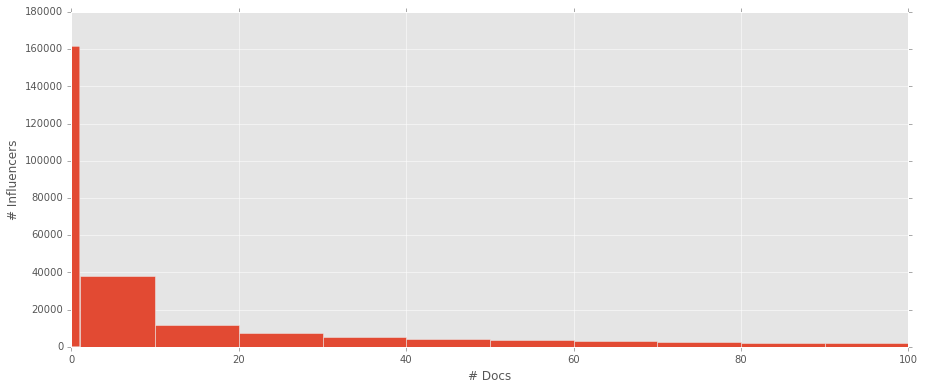

In [9]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%pylab inline
plt.figure()
x = influencer_subset_doc_count['doc_count_staging'].hist(figsize=(15,6), bins=[0,1,10,20,30,40,50,60,70,80,90,100])
plt.ylabel("# Influencers")
plt.xlabel("# Docs")

In [20]:
def get_doc_percentage(doc_count_hist, start_number, end_number) :
    percentage = 0.0
    if (end_number <= len(doc_count_hist)) :
        percentage = sum(doc_count_hist[start_number : end_number]) / sum(doc_count_hist)
    return round(percentage*100.0, 2)

doc_count_hist = influencer_subset_doc_count.groupby('doc_count_staging').count()['id']
print ("0 document: ", get_doc_percentage(doc_count_hist, 0, 0))
print ("1 to 10 documents: ", get_doc_percentage(doc_count_hist, 1, 10))
print ("10 to 20 documents: ", get_doc_percentage(doc_count_hist, 11, 20))
print ("21 to 30 documents: ", get_doc_percentage(doc_count_hist, 21, 30))
print ("31 to 50 documents: ", get_doc_percentage(doc_count_hist, 31, 50))
print ("51 to 100 documents: ", get_doc_percentage(doc_count_hist, 51, 99))
print ("more than 100 document: ", get_doc_percentage(doc_count_hist, 100, len(doc_count_hist)))

0 document:  62.14
1 to 10 documents:  15.33
10 to 20 documents:  4.35
21 to 30 documents:  2.77
31 to 50 documents:  3.61
51 to 100 documents:  4.67
more than 100 document:  6.87


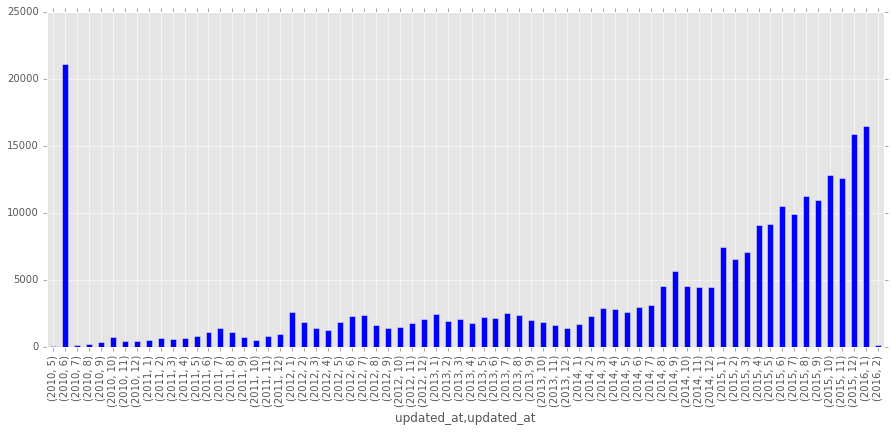

In [21]:
column_update = pd.to_datetime(influencer_subset_doc_count['updated_at'], errors='coerce')
column_update.groupby([column_update.dt.year, column_update.dt.month]).count().plot(figsize=(15,6), kind='bar')


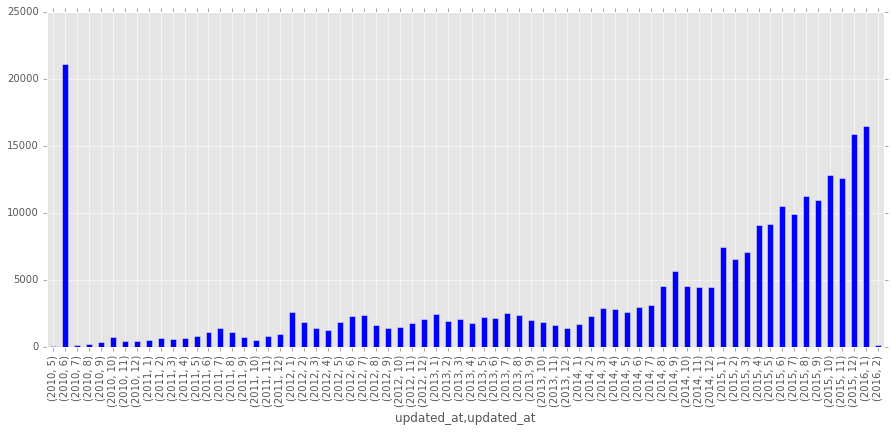

In [22]:
column_deeply_update = pd.to_datetime(influencer_subset_doc_count['deeply_updated_at'], errors='coerce')
column_deeply_update.groupby([column_update.dt.year, column_update.dt.month]).count().plot(figsize=(15,6), kind='bar')

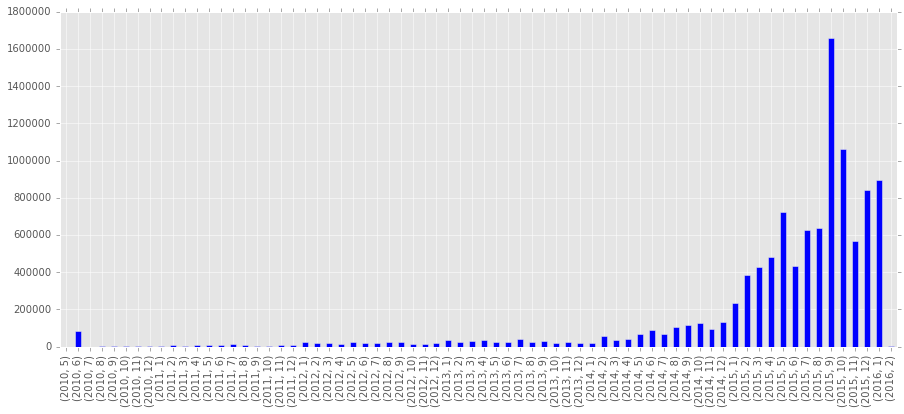

In [23]:
influencer_subset_doc_count['updated_at'] = pd.to_datetime(influencer_subset_doc_count['updated_at'])
new_df = influencer_subset_doc_count[['updated_at', 'doc_count_staging']]
deep_update_group = new_df.groupby([new_df['updated_at'].dt.year, new_df['updated_at'].dt.month]).groups
doc_count_update_date = {}

for element in sorted(deep_update_group.keys()):
    total_doc = sum(new_df.ix[deep_update_group[element]]['doc_count_staging'])
    doc_count_update_date[element] = int(total_doc)
dict_df = pd.Series(doc_count_update_date, name="Doc_count")
plt.figure()
dict_df.plot(figsize=(15,6), kind='bar')

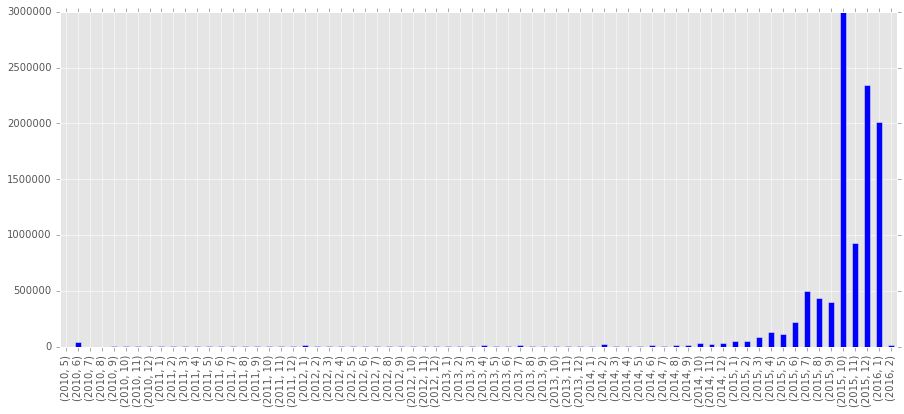

In [24]:
influencer_subset_doc_count['deeply_updated_at'] = pd.to_datetime(influencer_subset_doc_count['deeply_updated_at'])
new_df = influencer_subset_doc_count[['deeply_updated_at', 'doc_count_staging']]
deep_update_group = new_df.groupby([new_df['deeply_updated_at'].dt.year, new_df['deeply_updated_at'].dt.month]).groups
doc_count_update_date = {}

for element in sorted(deep_update_group.keys()):
    total_doc = sum(new_df.ix[deep_update_group[element]]['doc_count_staging'])
    doc_count_update_date[element] = int(total_doc)
dict_df = pd.Series(doc_count_update_date, name="Doc_count")
plt.figure()
dict_df.plot(figsize=(15,6), kind='bar')

53.03
16.47
5.41
3.62
4.77
6.38
9.77
123172


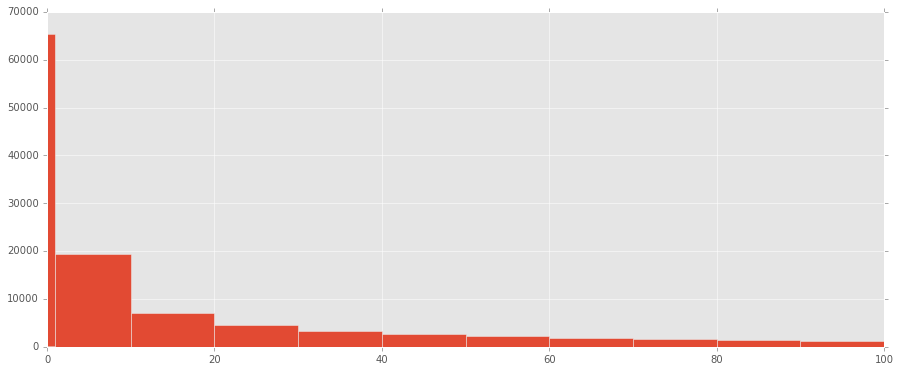

In [64]:
def get_doc_count(df, start_number, end_number):
    total_count = 0
    for element in df:
        if start_number == 0 and end_number == 0:
            if element == 0:
                total_count = total_count + 1
        else :
            if element >= start_number and element <= end_number:
                total_count = total_count + 1
    return total_count

influencer_subset_doc_count['updated_at'] = pd.to_datetime(influencer_subset_doc_count['updated_at'])
new_df = influencer_subset_doc_count[['updated_at', 'doc_count_staging']]
deep_update_group = new_df.groupby(new_df['updated_at'].dt.year).groups #.count().plot(figsize=(15,6), kind='bar')
df_subset_2015 = new_df.ix[deep_update_group[2015]]
x = df_subset_2015['doc_count_staging'].hist(figsize=(15,6), bins=[0,1,10,20,30,40,50,60,70,80,90,100])
df_count = df_subset_2015.groupby('doc_count_staging').count()['updated_at']
print (get_doc_percentage(df_count, 0, 0))
print (get_doc_percentage(df_count, 1, 10))
print (get_doc_percentage(df_count, 11, 20))
print (get_doc_percentage(df_count, 21, 30))
print (get_doc_percentage(df_count, 31, 50))
print (get_doc_percentage(df_count, 51, 99))
print (get_doc_percentage(df_count, 100, len(df_count)))

print (len(df_subset_2015))
#total_doc_count = 0
#for index, rows in df_subset_2015.iterrows():
#    total_doc_count = total_doc_count + rows['doc_count_staging']
#print(total_doc_count)